In [1]:
#Importing necessary packages
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Loading Dataset
iris = datasets.load_iris()

In [3]:
#Show the header (keys) of datasaet
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
#Description of the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Exploring the values of each features
print('target_name:')
print(iris['target_names'])

print('data:')
print(iris['data'][:5])

print('target:')
print(iris['target'])

print('feature_names:')
print(iris['feature_names'])

target_name:
['setosa' 'versicolor' 'virginica']
data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
feature_names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
#Preparing for the Analysis
Data = iris['data']
target = iris['target']
anaDf = pd.DataFrame(Data, columns = iris['feature_names'])
anaDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


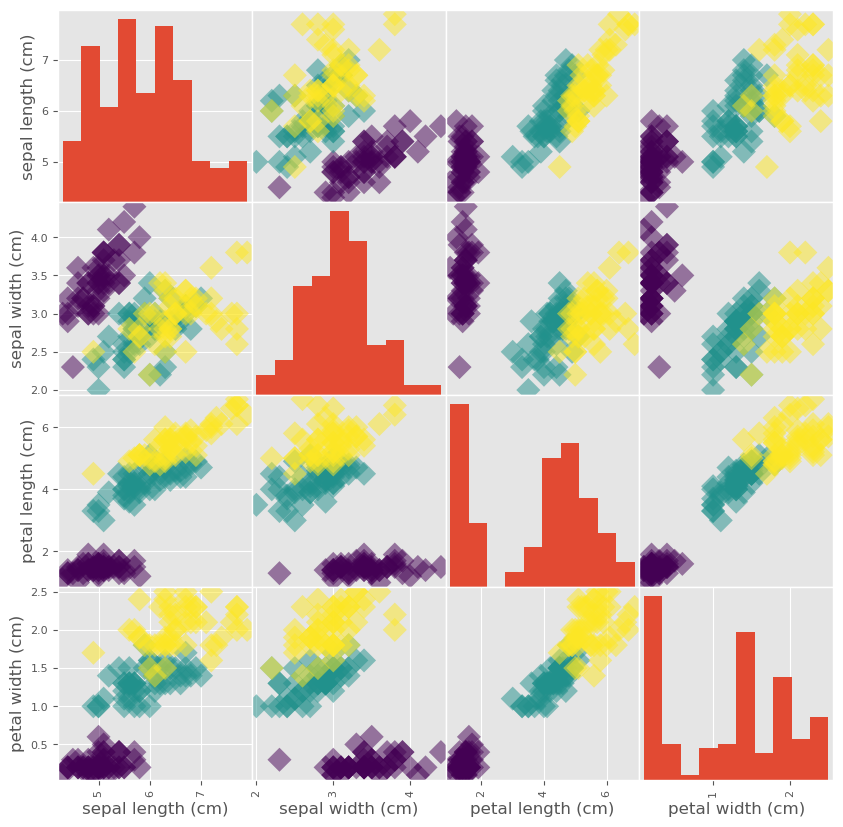

In [7]:
#Plot the data
_ = pd.plotting.scatter_matrix(anaDf, c = target, figsize = [10, 10], s = 150, marker = 'D')

In [8]:
#Drop the features
DataDrop = np.delete(iris['data'], [0,1], 1)
print(DataDrop[:].shape)
print(iris['data'].shape)

(150, 2)
(150, 4)


In [9]:
iris['feature_names'][2:4]

['petal length (cm)', 'petal width (cm)']

In [10]:
anaDfDrop = pd.DataFrame(DataDrop, columns = iris['feature_names'][2:4])
anaDfDrop.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


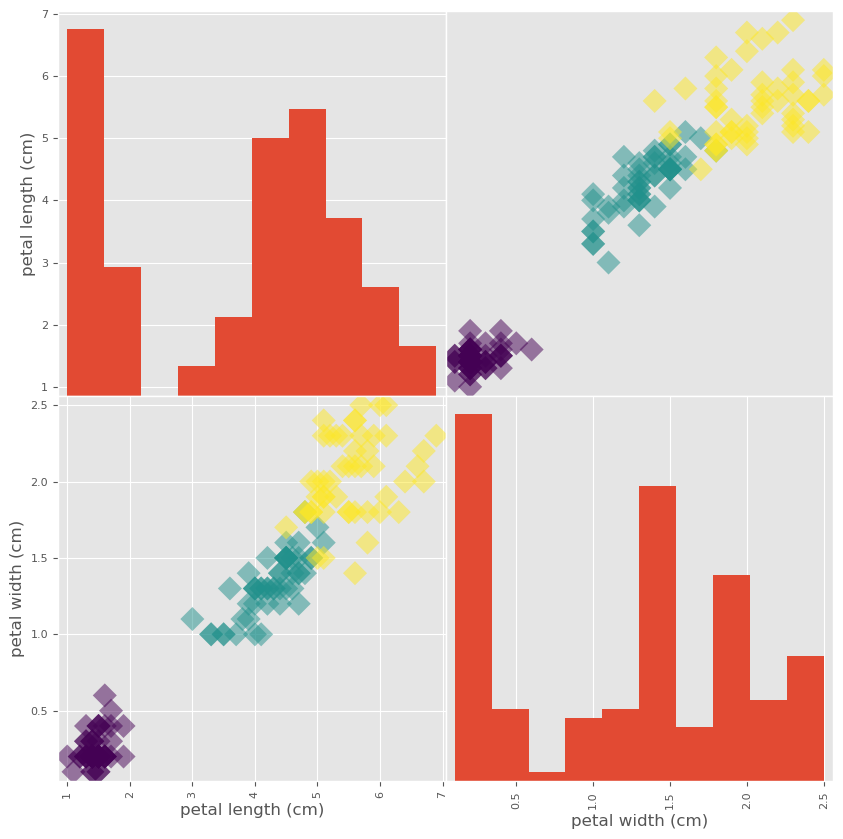

In [11]:
#Plot the data
_ = pd.plotting.scatter_matrix(anaDfDrop, c = target, figsize = [10, 10], s = 150, marker = 'D')

In [14]:
#Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [15]:
#Splitting dataset into Training and Testing datasets
Data_train, Data_test, target_train, target_test = train_test_split(Data, target, test_size = 0.2, random_state = 21, stratify = target)

In [16]:
#Declare the number of nearest neighbors to be observed
knn = KNeighborsClassifier(n_neighbors = 4)

In [17]:
#Fitting training data to the model
knn.fit(Data_train, target_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
#Predicting with the test data
target_predict = knn.predict(Data_test)

In [19]:
target_predict

array([1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0,
       2, 2, 2, 1, 2, 1, 2, 0])

In [20]:
#Checking performance of the model
knn.score(Data_test, target_test)

0.9666666666666667

In [21]:
cm = confusion_matrix(target_test, target_predict)
type(cm)

numpy.ndarray

In [22]:
cmdf = pd.DataFrame(cm)
cmdf

,0,1,2
0,10,0,0
1,0,9,1
2,0,0,10


In [23]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [24]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knnPer
    knnPer = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knnPer.fit(Data_train, target_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knnPer.score(Data_train, target_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knnPer.score(Data_test, target_test)

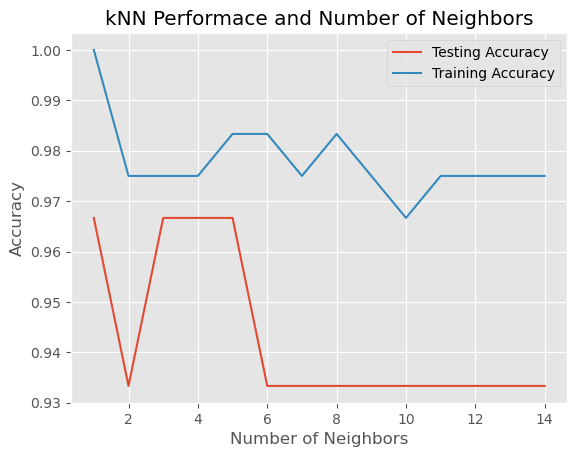

In [25]:
# Generate plot
plt.title('kNN Performace and Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
from sklearn.model_selection import KFold

In [28]:
foldsplit = 10

In [29]:
kf = KFold(n_splits = foldsplit)

In [30]:
train_accuracy_fold = np.empty(foldsplit)
test_accuracy_fold = np.empty(foldsplit)

In [31]:
knnFold = KNeighborsClassifier(n_neighbors = 4)
for k, (train_index, test_index) in enumerate(kf.split(DataDrop)):
    Data_train, Data_test = DataDrop[train_index], DataDrop[test_index]
    target_train, target_test = iris.target[train_index], iris.target[test_index]
    knnFold.fit(Data_train, target_train)
    train_accuracy_fold[k] = knnFold.score(Data_train, target_train)
    test_accuracy_fold[k] = knnFold.score(Data_test, target_test)
    #print "[fold {0}] score: {1:.5f}".format(k, train_accuracy[k])

In [32]:
test_accuracy_fold

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.73333333, 1.        ])

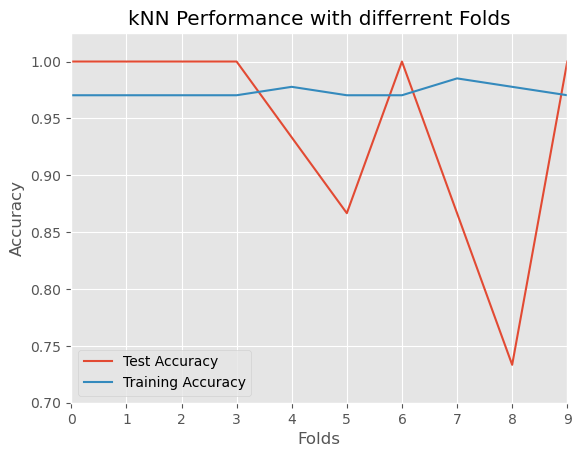

In [33]:
plt.title('kNN Performance with differrent Folds')
plt.plot(test_accuracy_fold, label = 'Test Accuracy')
plt.plot(train_accuracy_fold, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.ylim(0.70, 1.025)
plt.xlim(0, 9)
plt.show()

In [34]:
print(iris['data'][:50])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]


In [ ]:
import pickle

In [ ]:
with open('./model.pkl', 'wb') as model_pkl:
    pickle.dump(knn, model_pkl)